In [15]:
import hist
import pickle as pkl
from unfold_utils.unfolder import *
import ipywidgets as widgets
from IPython.display import display
from unfold_utils.draw_tools import * 
from unfold_utils.integrate_and_rebin import *

In [16]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-480 GeV",  r"$p_T$ 480-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]

In [30]:
closure  = False
groomed = False

In [31]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'

In [32]:
with open('latest_pkl/mpt/pythia_2203_mpt.pkl', "rb") as f:
    output_pythia= pkl.load( f )
with open("latest_pkl/mpt/data_2203_mpt.pkl", "rb") as f:
    output_data = pkl.load( f )

# with open("latest_pkl/herwig_0703.pkl", "rb") as f:
#     output_herwig = pkl.load( f )
    
# with open('latest_pkl/backgrounds_0703.pkl', "rb") as f:
#     output_bg= pkl.load( f )

# with open('latest_pkl/pythia_jk_0703.pkl', "rb") as f:
#     output_jk= pkl.load( f )
    


if not groomed:
    resp_matrix_4d = output_pythia['resp_mpt_u']
    input_data = output_data['m_over_pt_u']
    # fakes = output_pythia['fakes_u']
    # misses = output_pythia['misses_u']
    # hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    # resp_matrix_pythia = resp_matrix_4d
    # resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    # fakes_herwig = output_herwig['fakes_u']
    # misses_herwig = output_herwig['misses_u']
else:
    resp_matrix_4d = output_pythia['resp_mpt_g']
    input_data = output_data['m_over_pt_g']
    # fakes = output_pythia['fakes_g']
    # misses = output_pythia['misses_g']
    # hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    # resp_matrix_pythia = resp_matrix_4d
    # resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    # fakes_herwig = output_herwig['fakes_g']
    # misses_herwig = output_herwig['misses_g']

In [33]:
resp_matrix_4d.axes['mpt_reco'].edges

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.7  , 1.   ])

In [34]:
resp_matrix_4d.axes['mpt_gen'].edges

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.7 , 1.  ])

In [35]:
if not groomed:
    edges = [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
           0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
           0.45 , 0.475, 0.5  , 0.7  , 1.   ]
    
    edges_gen = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 1.  ]
if groomed:
    edges = [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
           0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
           0.45 , 0.475, 0.5  , 0.7  , 1.   ]
    
    edges_gen = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 1.  ]
    
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mpt_reco',edges )

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mpt_gen',edges_gen )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )




# fakes =  rebin_hist(fakes, 'mreco',edges )
# misses = rebin_hist(misses, 'mgen',edges_gen )
# hist_bg = rebin_hist(hist_bg, 'mreco',edges )
input_data = rebin_hist(input_data, 'mpt_reco',edges)

In [36]:
if groomed:
    key = 'response_matrix_g'
else:
    key = 'response_matrix_u'

unfolder = Unfolder_mpt(input_data, 
                    resp_matrix_4d ,
                    #resp_matrix_4d_jk,
                    #fakes = fakes,
                    #misses = misses,
                    #backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                    #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                    #systematics = sys_matrix_dic,
                    systematics= None,
                    #systematics = jes_sys_list_up,
                    closure = False,
                    groomed = groomed,
                    is_uf = True,
                    merge = False,
                    normalised_xs = True,
                    do_syst = True,
                    discard_low_bins = False,
                    regularisation= 'ScanSURE',
                    do_norm = False
                           )

11
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  1.  ]
22
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.7   1.   ]
Signal Binning created
Detector Binning created
shape of you (88,)


Unfolder object created
Condition number of the matrix  44.11616713907847


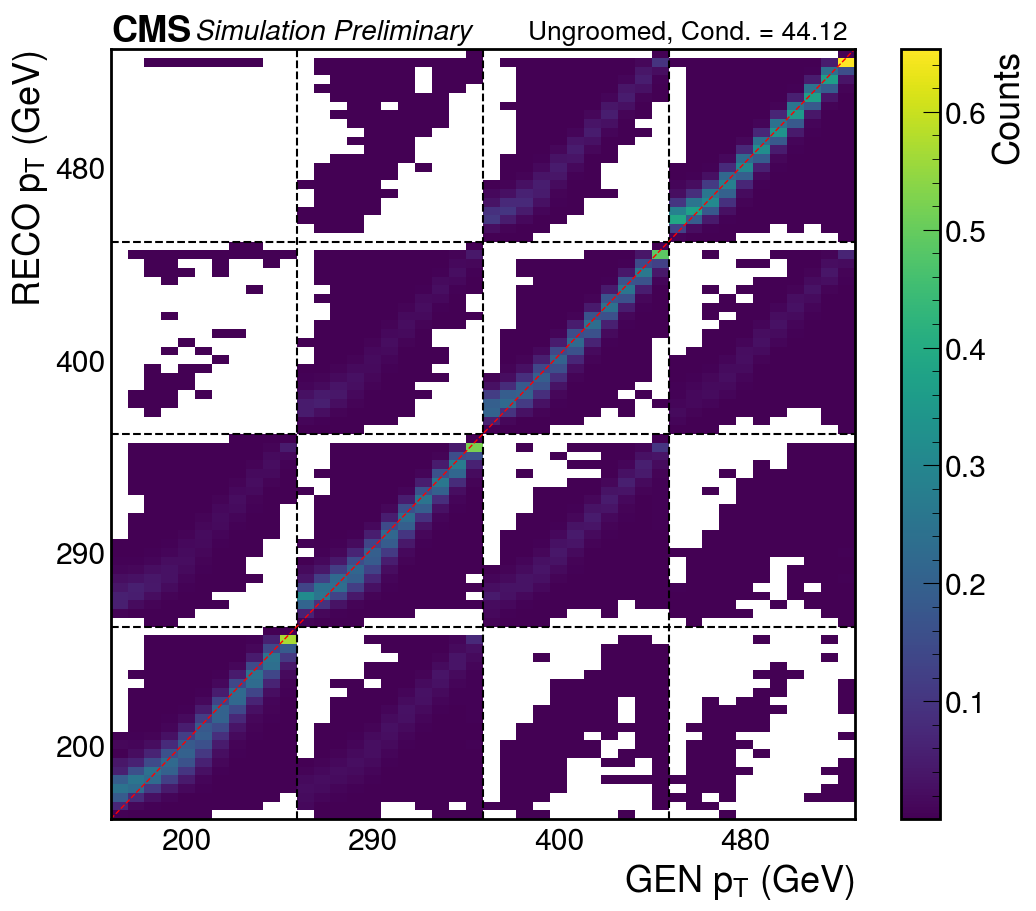

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 88 input bins and 44 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #45
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 5/88 input bins have zero error, and are ignored.
Warning in <TROOT::Append>: Replacing existing TH1: Prob (Potential memo

In [37]:
unfolder.plot_response_matrix(probability_matrix = True)

In [38]:
unfolder.perform_unfold(regularisation='ScanLcurve')

Unfolder object created
Regularisation USED ScanLcurve
Tau value 2.7384196342643613e-06
Output Underflow 0.0, output overflow 0.0
111131.495106774
111131.49510677399


Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 88 input bins and 44 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #45
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 5/88 input bins have zero error, and are ignored.
Info in <TUnfoldDensity::ScanLcurve>: logtau=-2.000000 X=4.525149 Y=8.11

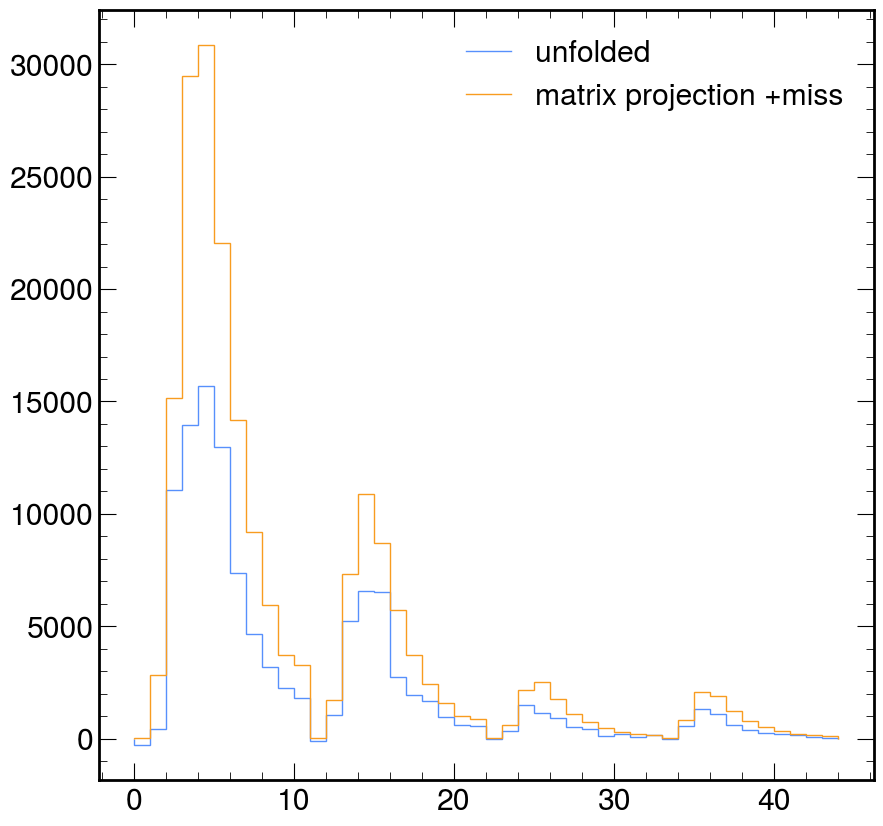

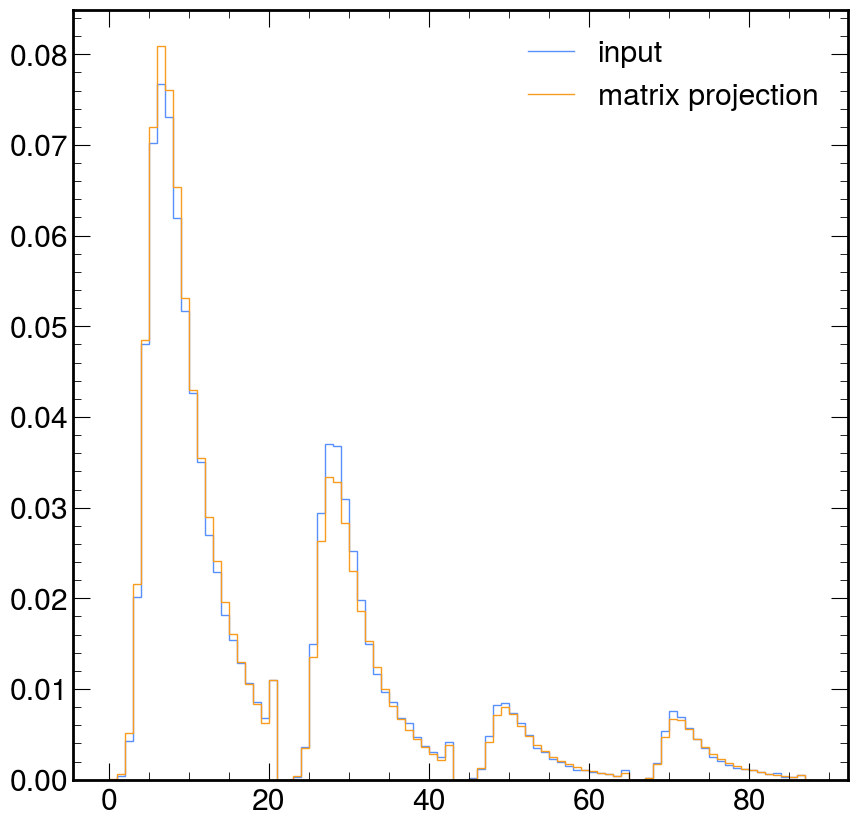

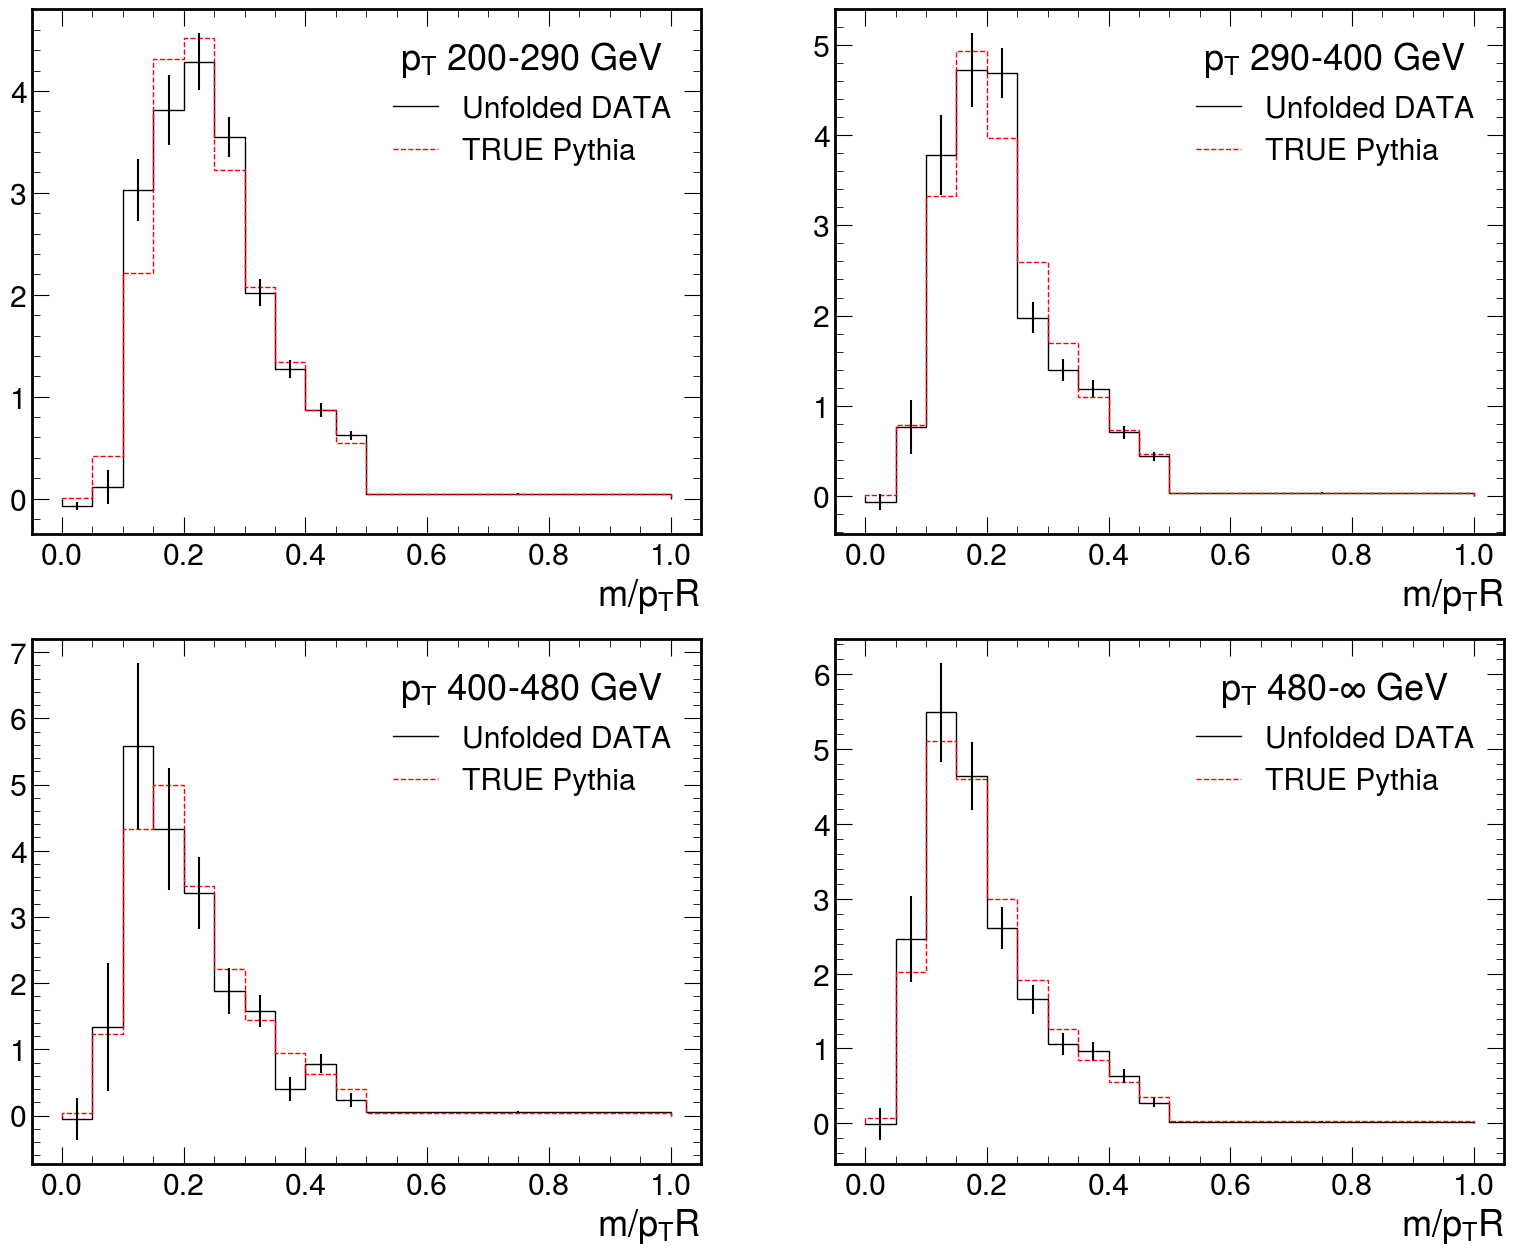

In [39]:
unfolder.plot_unfolded()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x75f96c4fbd10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

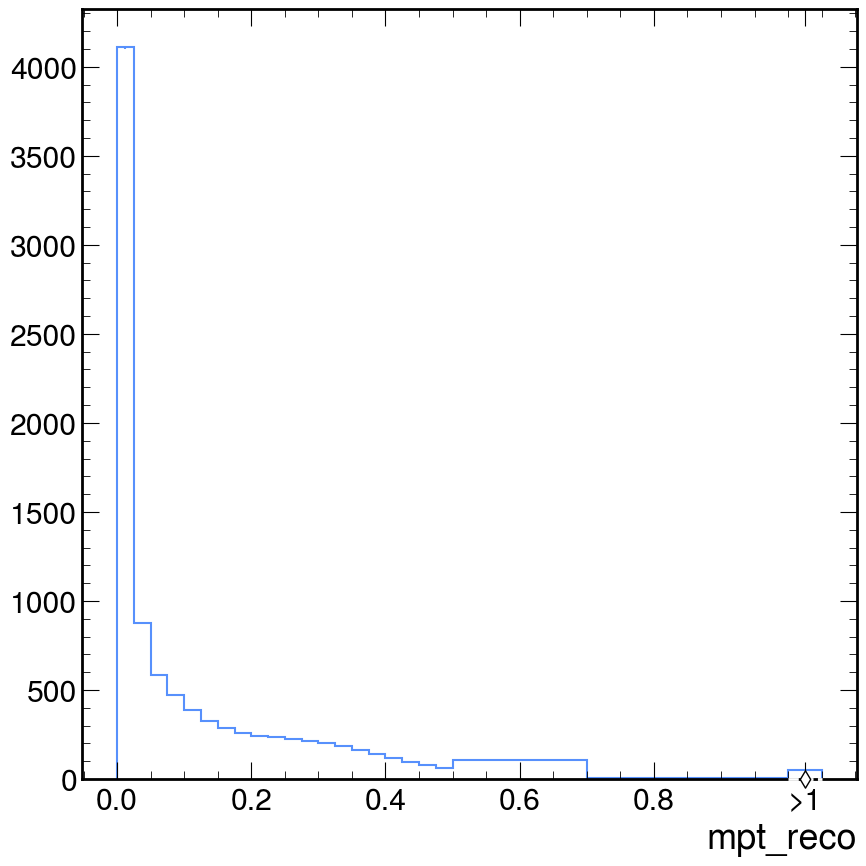

In [29]:
resp_matrix_4d.project('ptreco', 'mpt_reco')[3,:].plot(flow = 'show')